,Customer_ID,Age,Gender,Location,Subscription_Length_Months,Payment_Method,Internet_Usage_GB,Call_Duration_Minutes,Churn
0,CUST_1,56,Male,Suburban,7,UPI,27.09,936,1
1,CUST_2,73,Female,Suburban,16,Debit Card,29.03,497,0
2,CUST_3,30,Male,Urban,33,UPI,41.75,445,0
3,CUST_4,35,Male,Suburban,14,Debit Card,25.44,933,0
4,CUST_5,40,Male,Rural,33,UPI,36.27,357,0


Missing Values:
 Customer_ID                   0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Payment_Method                0
Internet_Usage_GB             0
Call_Duration_Minutes         0
Churn                         0
dtype: int64
Model Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81     12525
           1       0.32      0.03      0.05      5475

    accuracy                           0.69     18000
   macro avg       0.51      0.50      0.43     18000
weighted avg       0.58      0.69      0.58     18000



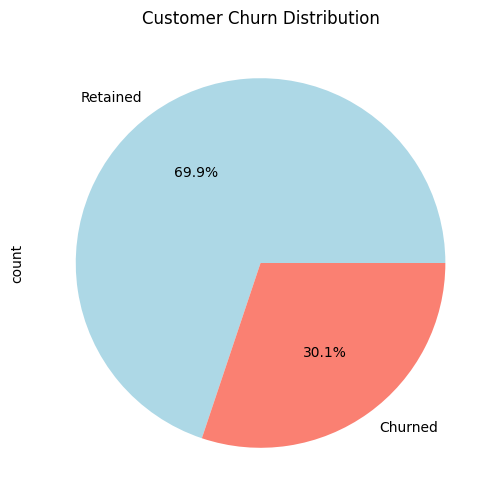

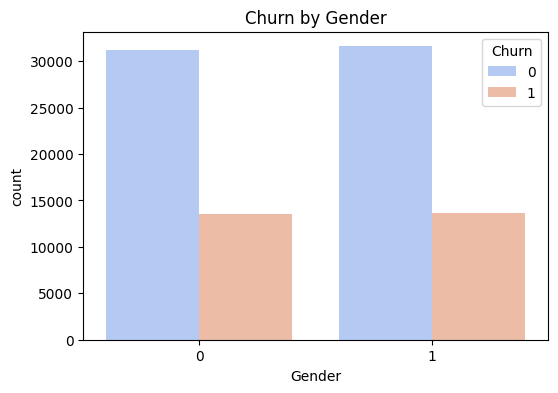

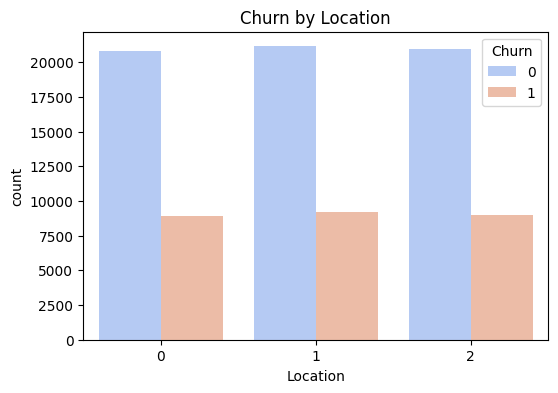

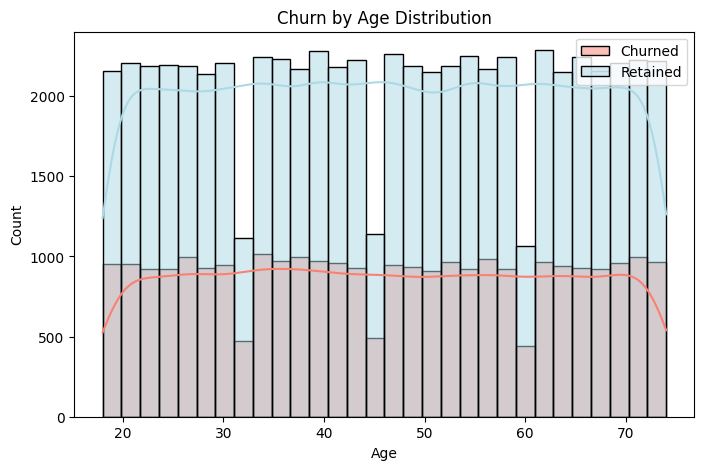

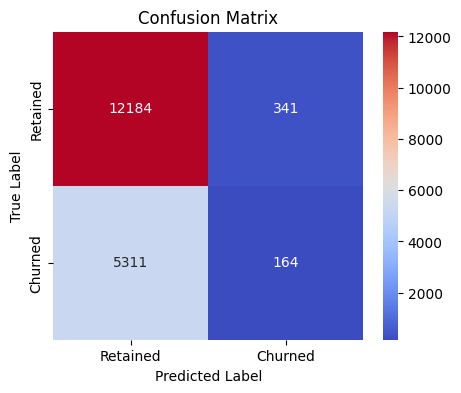

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_excel("Large_Customer_Churn_Prediction.xlsx")

# Display first 5 rows
display(df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Encoding categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])  # Fix for the error

# Define features (X) and target (y)
X = df.drop(columns=['Churn', 'Customer_ID'])  # Correct column names
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", class_report)


# 1️⃣ Churn Distribution Pie Chart
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'], labels=['Retained', 'Churned'])
plt.title("Customer Churn Distribution")
plt.show()

# 2️⃣ Churn by Gender Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Gender")
plt.show()

# 3️⃣ Churn by Location Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(x='Location', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Location")
plt.show()

# 4️⃣ Churn by Age Histogram
plt.figure(figsize=(8,5))
sns.histplot(df[df['Churn'] == 1]['Age'], bins=30, color='salmon', kde=True, label="Churned")
sns.histplot(df[df['Churn'] == 0]['Age'], bins=30, color='lightblue', kde=True, label="Retained")
plt.legend()
plt.title("Churn by Age Distribution")
plt.show()

# 5️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()